Importeer de data. Per persoon is de volgende data beschikbaar: Woonplaats, Geslacht, Leeftijd, Omvang huishouden (aantal personen), Scholing, Lengte en Gewicht. Het aantal stappen is voor 900 mensen bijgehouden aan de hand van activity trackers.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")

steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vervolgens worden de bestanden samengevoegd waarbij het aantal stappen rechts van de survey is geplaatst.

In [2]:
df = survey.merge(steps, on="id")

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Run describe

In [3]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


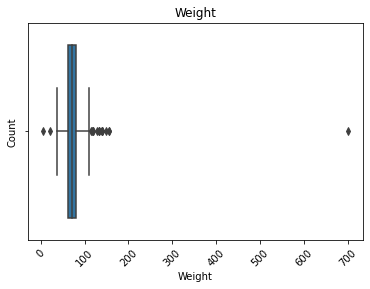

In [4]:
sns.boxplot(x="weight", data=df)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [5]:
df['weight']=df['weight'].replace(700,np.nan)

Bereken het gemiddelde per rij

In [6]:
df["steps_mean"]=df.iloc[:,9:336].mean(axis=1)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps_mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


Maak een histogram en boxplot van steps_mean

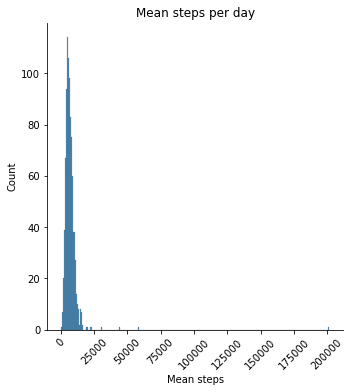

In [7]:
sns.displot(x="steps_mean", kde=False, data=df) #kde=False means we don't get an overlying density plot
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

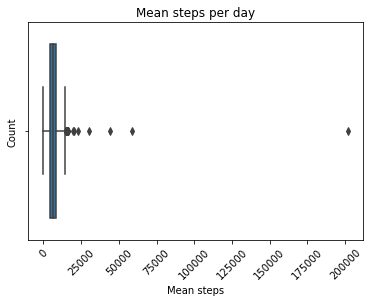

In [8]:
sns.boxplot(x="steps_mean", data=df)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bereken de mean, median en std deviatie

In [9]:
print('Median = '+str(df['steps_mean'].median()))
print('Mean = '+str(df['steps_mean'].mean()))
print('St Dev. = '+str(df['steps_mean'].std()))

Median = 6245.006060606061
Mean = 7036.627484984338
St Dev. = 7396.87900787018


Er zitten overduidelijk extreme waarden in die de mean beinvloeden, dus waarden boven de 50000 filter ik eruit. 
Dit heeft een behoorlijke invoed op de std deviatie.

In [10]:
df=df[df['steps_mean']<50000]

In [11]:
print('Median = '+str(df['steps_mean'].median()))
print('Mean = '+str(df['steps_mean'].mean()))
print('St Dev. = '+str(df['steps_mean'].std()))

Median = 6244.857142857143
Mean = 6769.953148475565
St Dev. = 3283.3871886799316


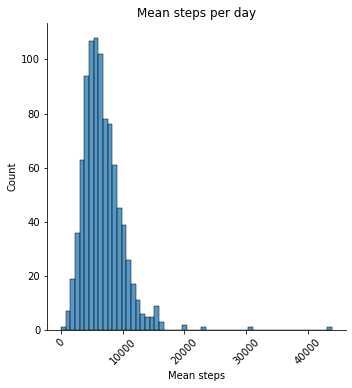

In [12]:
sns.displot(x="steps_mean", kde=False, data=df) #kde=False means we don't get an overlying density plot
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Nu bekijken we het verschil per leeftijd en opleidingsniveau

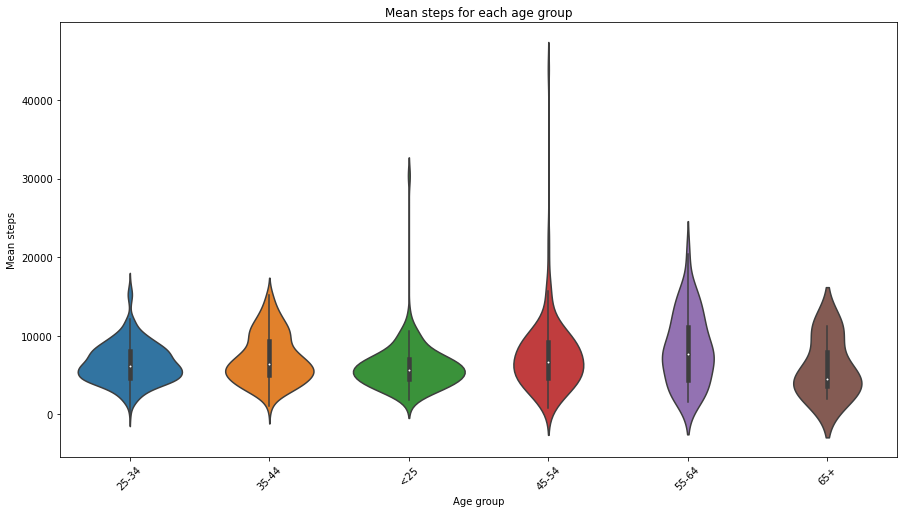

In [13]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.violinplot(x='age',y='steps_mean',data=df)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

Jongere mensen lopen over het algemeen minder dan oudere mensen, maar bij de oudere groep is het verschil binnen de groep ook groter

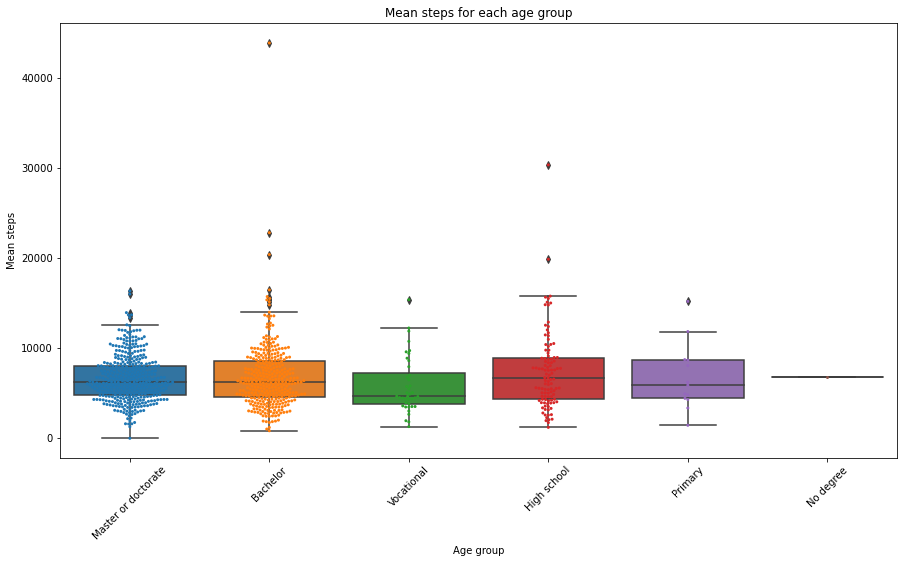

In [14]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.boxplot(x='education_1',y='steps_mean',data=df)
sns.swarmplot(x='education_1',y='steps_mean', size=3, data=df)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

De meeste deelnemers zijn hoogopgeleid, dus er lijkt mij te weinig data beschikbaar om een uitspraak te doen over het opleidingsniveau en stappen

----------------------------------------------------------------------------------------------------------------------------

Assignment 2
Hier zal een scatterplot en een correlatie worden toegevoegd voor het gewicht/lengte/educatie en het aantal stappen.

<function matplotlib.pyplot.show(close=None, block=None)>

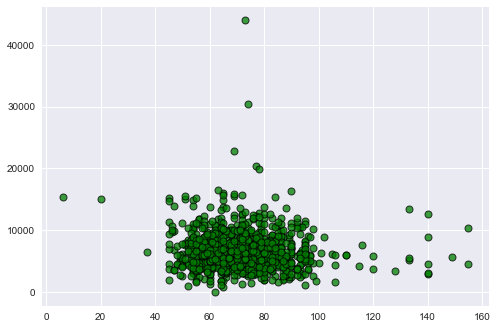

In [15]:
plt.style.use("seaborn")

plt.scatter("weight", "steps_mean", c="green", edgecolor="black", linewidth=1, alpha=0.75, data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

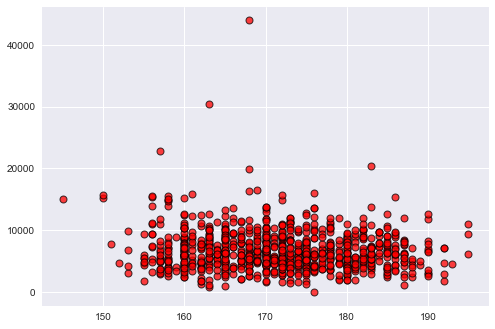

In [16]:
plt.style.use("seaborn")

plt.scatter("height", "steps_mean", c="red", edgecolor="black", linewidth=1, alpha=0.75, data=df)
plt.show

Wanneer de lengte tegen het aantal stappen wordt afgezet is er niet een duidelijk verband te zien. Lengte lijkt geen invloed te hebben op hoeveel stappen iemand zet, want de figuur is evenredig verdeeld.

<function matplotlib.pyplot.show(close=None, block=None)>

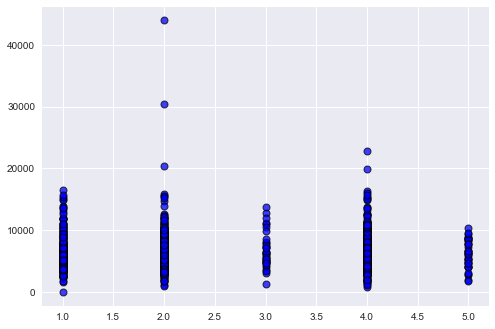

In [17]:
plt.style.use("seaborn")

plt.scatter("education", "steps_mean", c="blue", edgecolor="black", linewidth=1, alpha=0.75, data=df)
plt.show

Wanneer we naar educatie ten opzichte van de stappen kijken zien we een grote variatie per opleidingsniveau en niet een duidelijk verband tussen educatie en het aantal stappen.

De correlatie tussen de numerieke waarden lengte, gewicht en stappen is als volgt.

In [18]:
df_numeric = df[["height", "weight", "education", "steps_mean"]]
df_numeric.corr()

,height,weight,education,steps_mean
height,1.000000,0.514151,-0.041354,-0.089823
weight,0.514151,1.000000,0.000375,-0.074907
education,-0.041354,0.000375,1.000000,0.013188
steps_mean,-0.089823,-0.074907,0.013188,1.000000


Hier is te zien dat lengte/gewicht/educatie niet zijn gecorreleerd aan de steps, want deze waardes liggen er dicht bij 0.

----------------------------------------------------------------------------------------------------------------------------

Assignment 3
Binnen assignment 3 worden correlatie en lineaire regressie toegepast op de hiervoor gebruikte dataset. 

Lineaire regressie in eigen woorden:
Met lineaire regressie wordt de waarde van de afhankelijke variabele voorspeld aan de hand van de onafhankelijke variabele(n). In dit geval proberen we de afhankelijke variabele steps te voorspellen. 


In eerste instantie worden er dummy variabelen aangemaakt:

In [19]:
df_sub = df[["gender", "age", "education", "height", "weight"]]

df_sub.head()

,gender,age,education,height,weight
0,Male,25-34,4,178.0,98.0
1,Male,35-44,3,180.0,77.0
2,Male,25-34,2,180.0,83.0
3,Male,<25,1,178.0,80.0
4,Female,25-34,4,167.0,61.0


Check of de data levels heeft

In [20]:
df_sub["age"].value_counts()

25-34    424
35-44    176
45-54    146
<25      124
55-64     46
65+        7
Name: age, dtype: int64

In [21]:
df = pd.get_dummies(df_sub,columns=["age"],drop_first= True)
df.head()

,gender,education,height,weight,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,Male,4,178.0,98.0,0,0,0,0,0
1,Male,3,180.0,77.0,1,0,0,0,0
2,Male,2,180.0,83.0,0,0,0,0,0
3,Male,1,178.0,80.0,0,0,0,0,1
4,Female,4,167.0,61.0,0,0,0,0,0


Split de data in een trainingsset en een testset 

In [22]:
x = df.loc[:, ~df.columns.isin(["age"])]
y = df["age"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=23)

KeyError: 'age'

In [ ]:
Ik krijg het niet voor elkaar om deze foutmelding eruit te krijgen, dus hier loop ik vast. De vervolgstappen zijn wel uitgewerkt.

Zet een model op met de trainingdata

In [ ]:
lm = LinearRegression() 

lm = lm.fit(x_train, y_train)

Bereken de voorspelling voor de test data

In [ ]:
y_test_p = lm.predict(x_test)

Berekend de kracht van het model (R2)

In [ ]:
r2_score(y_test, y_test_p)